# Unsupervised Learning Project: Student Lifestyle Analysis

## Problem Description

This project uses unsupervised learning techniques to analyze alcohol consumption patterns among secondary school students. The goal is to:
1. Reduce data dimensionality using Principal Component Analysis (PCA).
2. Identify clusters of students with similar behaviors using K-Means clustering.
3. Explore latent factors contributing to these behaviors using Non-Negative Matrix Factorization (NMF).

This analysis provides insights into the social and academic factors influencing student alcohol consumption, helping inform targeted interventions.

- **Type of Learning**: Unsupervised Learning
- **Methods**: PCA, Clustering, and NMF
- **Data Source**: https://www.kaggle.com/datasets/uciml/student-alcohol-consumption/data
- **Github Repo**: https://github.com/mrpete5/unsupervised-learning.git

In [130]:
import pandas as pd

# Load the datasets and merge the data
math_data = pd.read_csv("student-mat.csv", sep=",")
portuguese_data = pd.read_csv("student-por.csv", sep=",")

merged_data = pd.concat([math_data, portuguese_data], ignore_index=True)

print(f"Merged dataset contains {merged_data.shape[0]} rows and {merged_data.shape[1]} columns.")
print(merged_data.head())

Merged dataset contains 1044 rows and 33 columns.
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


## Data Description

The dataset combines information from two sources:
1. **Math Course Data** (`student-mat.csv`)
2. **Portuguese Course Data** (`student-por.csv`)

These datasets have been merged to create a single dataset.

### Dataset Overview:
- **Number of Samples (Rows)**: 1,044
- **Number of Features (Columns)**: 33
- **Data Size**: Approximately 108 KB combined from the two datasets
- **Feature Types**:
  - **Categorical Features (10)**:
    - Examples: `school`, `sex`, `address`, `famsize`
  - **Numerical Features (23)**:
    - Examples: `age`, `studytime`, `Dalc`, `Walc`, `absences`

### Key Features:
1. **Dalc**: Workday alcohol consumption (scale 1-5).
2. **Walc**: Weekend alcohol consumption (scale 1-5).
3. **Studytime**: Weekly study time (scale 1-4).
4. **Goout**: Frequency of going out with friends (scale 1-5).
5. **Absences**: Total number of school absences (range 0-93).


In [131]:
print("Missing values per column:")
print(merged_data.isnull().sum())

# Convert categorical variables to lowercase
categorical_columns = merged_data.select_dtypes(include="object").columns
merged_data[categorical_columns] = merged_data[categorical_columns].apply(lambda x: x.str.strip().str.lower())

# Scale numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_columns = merged_data.select_dtypes(include="number").columns
merged_data[numerical_columns] = scaler.fit_transform(merged_data[numerical_columns])

print("Cleaned dataset preview:")
print(merged_data.head())

Missing values per column:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64
Cleaned dataset preview:
  school sex       age address famsize Pstatus      Medu      Fedu     Mjob  \
0     gp   f  1.027889       u     gt3       a  1.242077  1.466302  at_home   
1     gp   f  0.221035       u     gt3       t -1.426089 -1.262431  at_home   
2     gp   f -1.392674       u     le3       t -1.426089 -1.262431  at_home   
3     gp   f -1.392674       u     gt3       t  1.242077 -0.352853   health   
4     gp   f

## Data Cleaning
The dataset was cleaned to prepare it for analysis and modeling. The following steps were performed:

1. **Missing Values**:
   - Checked for missing values in all features. None were found, so no row removal was necessary.

2. **Categorical Variables**:
   - Cleaned by stripping whitespace and converting values to lowercase for consistency.

3. **Numerical Variables**:
   - Scaled all numeric features (e.g., `Dalc`, `Walc`, `studytime`, `absences`) to ensure consistent ranges, which is important for distance-based models like PCA and clustering.

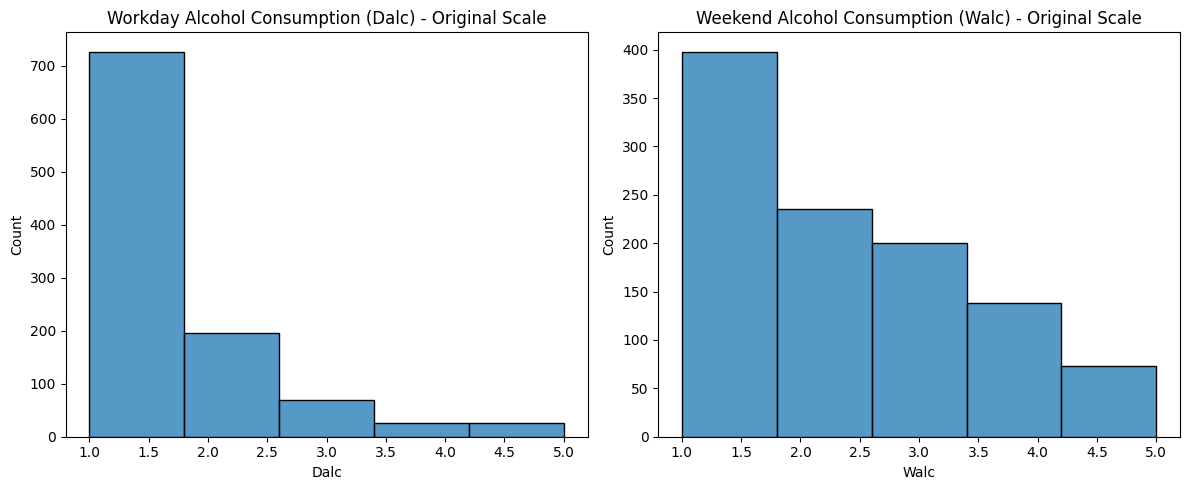

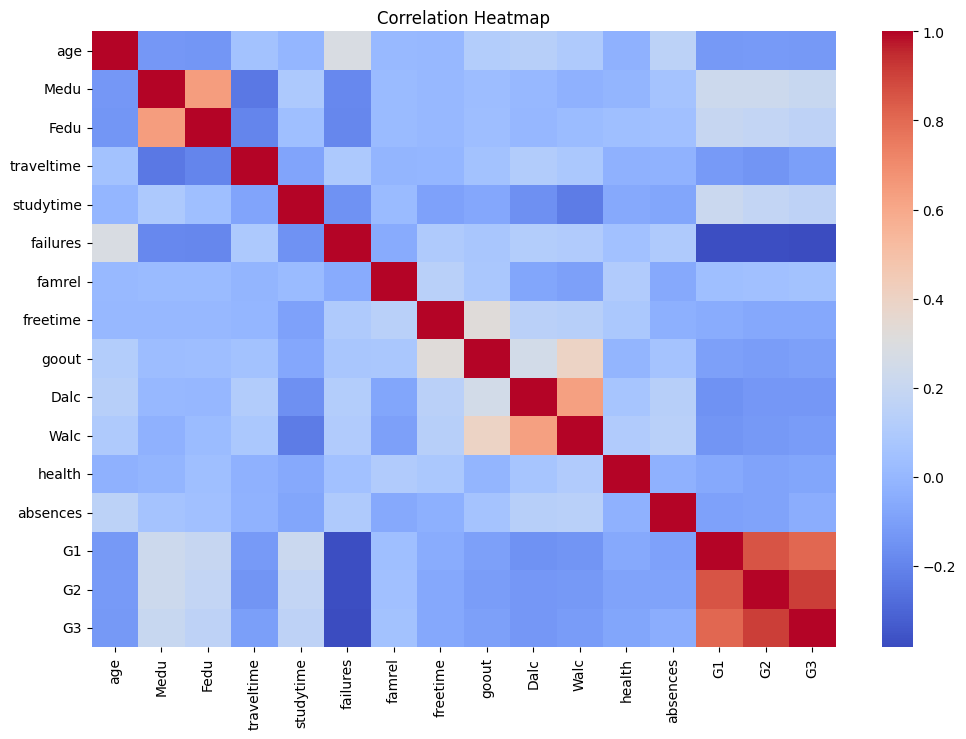

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for alcohol consumption
original_data = pd.concat([math_data, portuguese_data], ignore_index=True)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(original_data["Dalc"], bins=5, kde=False, ax=axes[0])
axes[0].set_title("Workday Alcohol Consumption (Dalc) - Original Scale")
sns.histplot(original_data["Walc"], bins=5, kde=False, ax=axes[1])
axes[1].set_title("Weekend Alcohol Consumption (Walc) - Original Scale")
plt.tight_layout()
plt.show()

# Correlation heatmap
numeric_data = merged_data.select_dtypes(include=["number"])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

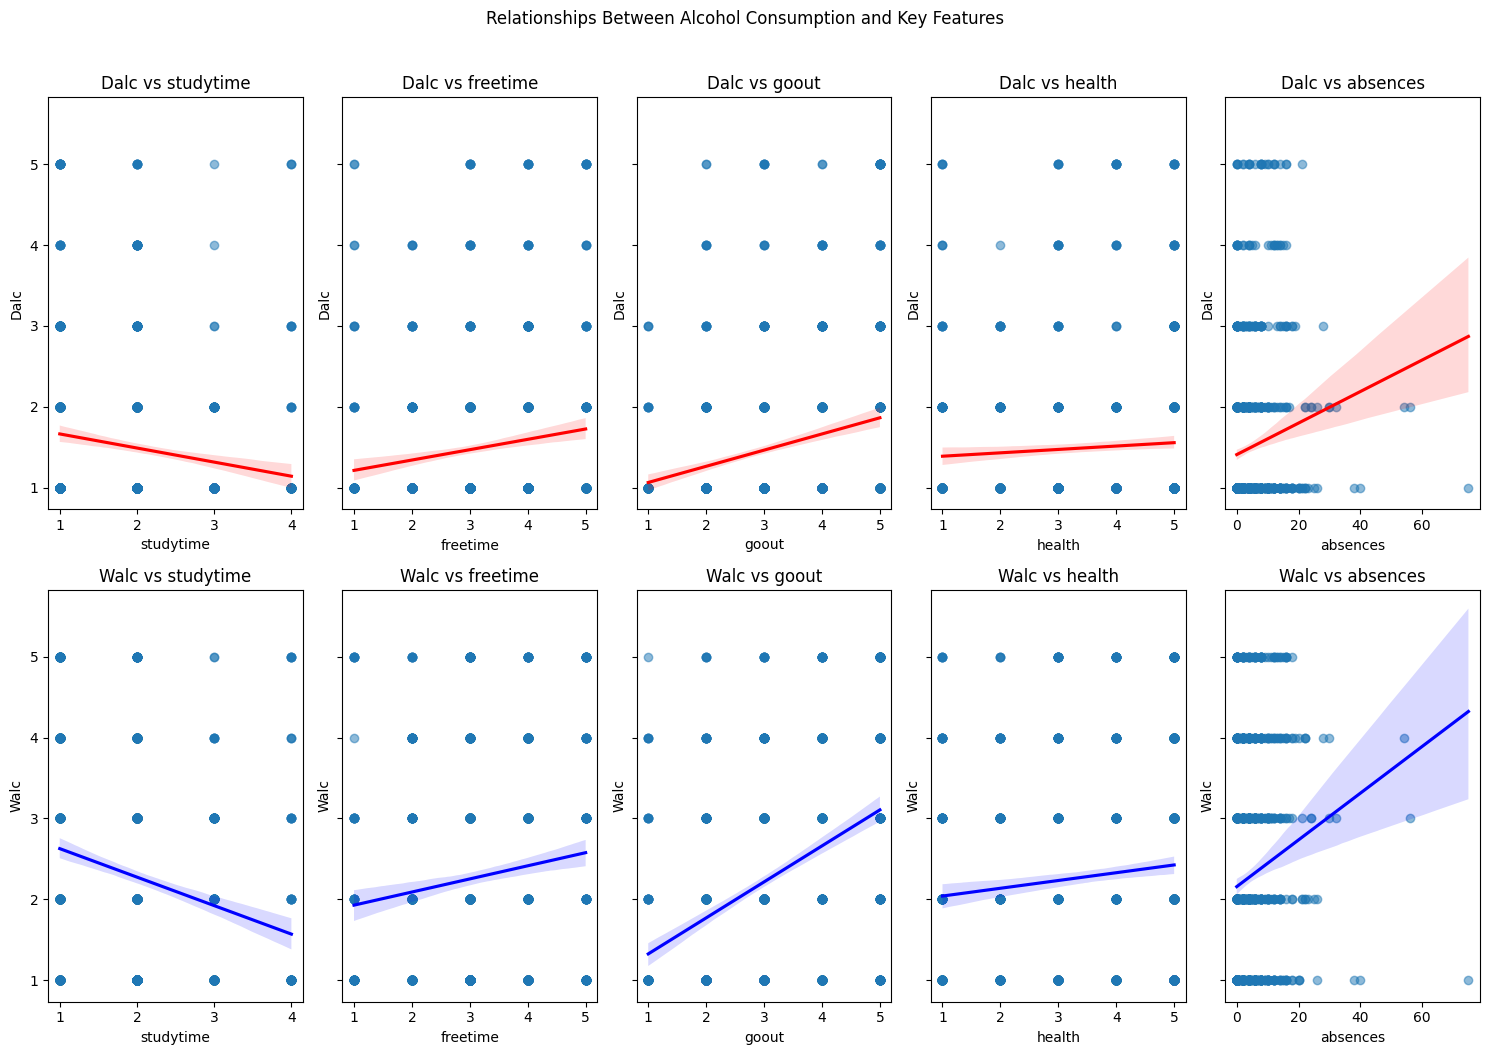

In [133]:
# Key features to analyze relationships with Dalc and Walc
key_features = ["studytime", "freetime", "goout", "health", "absences"]

# Create scatter plots with trendlines for Dalc
fig, axes = plt.subplots(2, len(key_features), figsize=(15, 10), sharey=True)

# Workday Alcohol Consumption (Dalc)
for i, feature in enumerate(key_features):
    sns.regplot(
        x=feature, y="Dalc", data=original_data, ax=axes[0, i], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"}
    )
    axes[0, i].set_title(f"Dalc vs {feature}")
    axes[0, i].set_xlabel(feature)
    axes[0, i].set_ylabel("Dalc")

# Weekend Alcohol Consumption (Walc)
for i, feature in enumerate(key_features):
    sns.regplot(
        x=feature, y="Walc", data=original_data, ax=axes[1, i], scatter_kws={"alpha": 0.5}, line_kws={"color": "blue"}
    )
    axes[1, i].set_title(f"Walc vs {feature}")
    axes[1, i].set_xlabel(feature)
    axes[1, i].set_ylabel("Walc")

plt.tight_layout()
plt.suptitle("Relationships Between Alcohol Consumption and Key Features", y=1.05)
plt.show()

## Exploratory Data Analysis (EDA)

1. **Workday Alcohol Consumption (Dalc)**:
   - **Studytime**: Slight negative trend; less study time with higher Dalc.
   - **Freetime & Goout**: Positive trends; more free time and going out linked to higher Dalc.
   - **Health**: No clear relationship.
   - **Absences**: Positive trend; higher Dalc correlates with more absences.

2. **Weekend Alcohol Consumption (Walc)**:
   - **Studytime**: Negative trend; less study time with higher Walc.
   - **Freetime & Goout**: Positive trends; higher Walc associated with more social activities.
   - **Health**: No clear relationship.
   - **Absences**: Positive trend; higher Walc correlates with more absences.

## Models

Explained Variance by PCA1: 21.81%
Explained Variance by PCA2: 12.36%
PCA Loadings:
                PCA1      PCA2
age         0.157242  0.042291
Medu       -0.220839  0.296127
Fedu       -0.196175  0.307153
traveltime  0.139557 -0.062544
studytime  -0.178822 -0.146802
failures    0.304634 -0.044362
famrel     -0.038420  0.008169
freetime    0.091529  0.261412
goout       0.139939  0.409485
Dalc        0.192343  0.462387
Walc        0.197162  0.506921
health      0.060706  0.083509
absences    0.083030  0.163998
G1         -0.454374  0.118320
G2         -0.465862  0.130025
G3         -0.452104  0.130845

### PCA1 (Academic Performance vs Challenges):
Top contributors to PCA1:
failures    0.304634
Walc        0.197162
Dalc        0.192343
age         0.157242
goout       0.139939
Name: PCA1, dtype: float64

Negative contributors to PCA1:
Fedu   -0.196175
Medu   -0.220839
G3     -0.452104
G1     -0.454374
G2     -0.465862
Name: PCA1, dtype: float64

### PCA2 (Social Behavior and Alcohol 

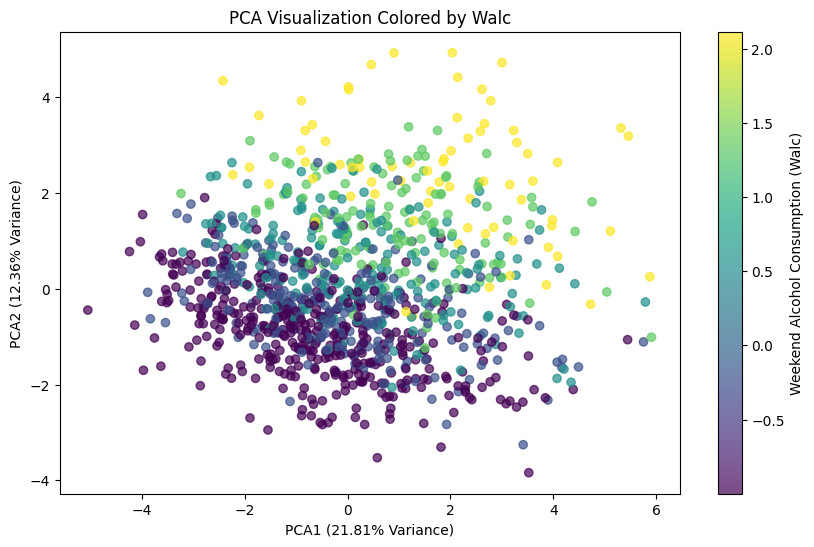

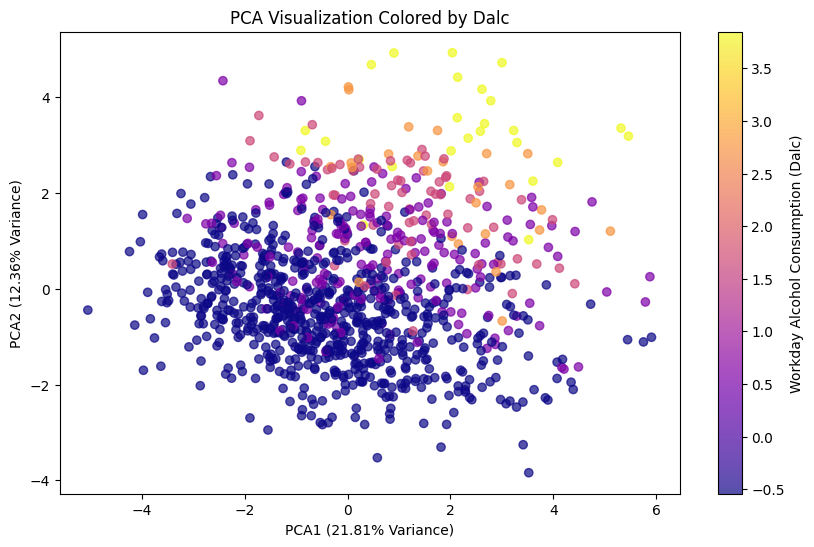

In [134]:
from sklearn.decomposition import PCA

# Select numeric features for PCA
numeric_features = merged_data.select_dtypes(include="number")

# Apply PCA with 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(numeric_features)

# Add PCA results to the dataset
merged_data["PCA1"] = pca_result[:, 0]
merged_data["PCA2"] = pca_result[:, 1]

# Variance explained by each component
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by PCA1: {explained_variance[0]*100:.2f}%")
print(f"Explained Variance by PCA2: {explained_variance[1]*100:.2f}%")

# Examine PCA loadings (contributions of features to each component)
pca_loadings = pd.DataFrame(
    pca.components_.T,
    index=numeric_features.columns,
    columns=["PCA1", "PCA2"]
)
print("PCA Loadings:")
print(pca_loadings)

# Interpret PCA1 and PCA2
print("\n### PCA1 (Academic Performance vs Challenges):")
pca1_features = pca_loadings["PCA1"].sort_values(ascending=False)
print("Top contributors to PCA1:")
print(pca1_features.head())
print("\nNegative contributors to PCA1:")
print(pca1_features.tail())

print("\n### PCA2 (Social Behavior and Alcohol Consumption):")
pca2_features = pca_loadings["PCA2"].sort_values(ascending=False)
print("Top contributors to PCA2:")
print(pca2_features.head())
print("\nNegative contributors to PCA2:")
print(pca2_features.tail())

# Visualize PCA results with Walc
plt.figure(figsize=(10, 6))
plt.scatter(merged_data["PCA1"], merged_data["PCA2"], alpha=0.7, c=merged_data["Walc"], cmap="viridis")
plt.colorbar(label="Weekend Alcohol Consumption (Walc)")
plt.title("PCA Visualization Colored by Walc")
plt.xlabel(f"PCA1 ({explained_variance[0]*100:.2f}% Variance)")
plt.ylabel(f"PCA2 ({explained_variance[1]*100:.2f}% Variance)")
plt.show()

# Visualize PCA results with Dalc
plt.figure(figsize=(10, 6))
plt.scatter(merged_data["PCA1"], merged_data["PCA2"], alpha=0.7, c=merged_data["Dalc"], cmap="plasma")
plt.colorbar(label="Workday Alcohol Consumption (Dalc)")
plt.title("PCA Visualization Colored by Dalc")
plt.xlabel(f"PCA1 ({explained_variance[0]*100:.2f}% Variance)")
plt.ylabel(f"PCA2 ({explained_variance[1]*100:.2f}% Variance)")
plt.show()

## Principal Component Analysis (PCA)

### Key Insights:
1. **Explained Variance**:
   - PCA1 explains **21.81%**, and PCA2 explains **12.36%**, capturing **34.17%** of the total variance in student behaviors.

2. **Interpretation of Principal Components**:
   - **PCA1**: Represents **academic performance vs. challenges**.
     - Higher scores are associated with more `failures` and higher `Dalc` (workday alcohol consumption).
     - Lower scores are tied to better grades (`G1`, `G2`, `G3`) and higher parental education.
   - **PCA2**: Reflects **social behavior and alcohol consumption**.
     - Strongly influenced by `Walc`, `Dalc`, `goout`, and `freetime`.
     - Higher scores indicate more social activity and alcohol consumption.

3. **Visualizations**:
   - Students with higher `Walc` cluster toward higher PCA2 values, highlighting the link between social activity and weekend drinking.
   - Similar clustering is observed for `Dalc` in relation to PCA2, reinforcing the connection between social factors and alcohol use.

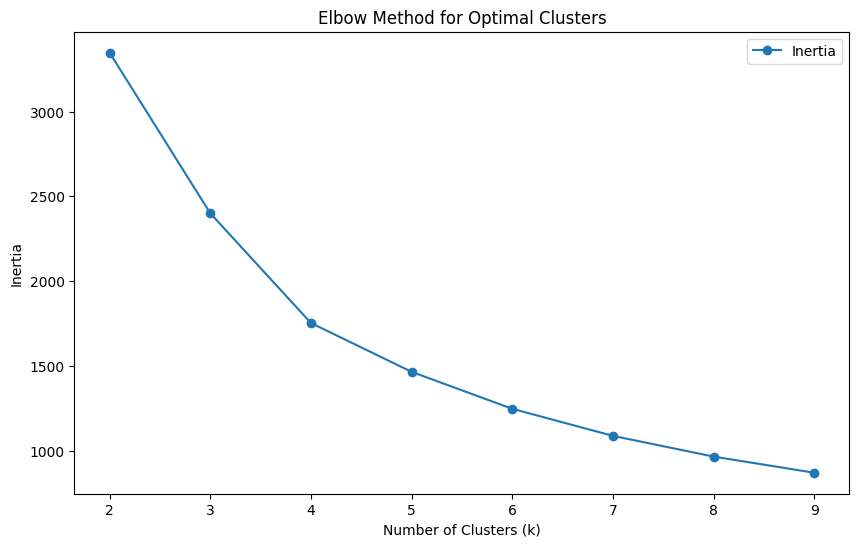

Silhouette Scores:
k=2: Silhouette Score=0.376
k=3: Silhouette Score=0.362
k=4: Silhouette Score=0.367
k=5: Silhouette Score=0.349
k=6: Silhouette Score=0.333
k=7: Silhouette Score=0.340
k=8: Silhouette Score=0.338
k=9: Silhouette Score=0.332


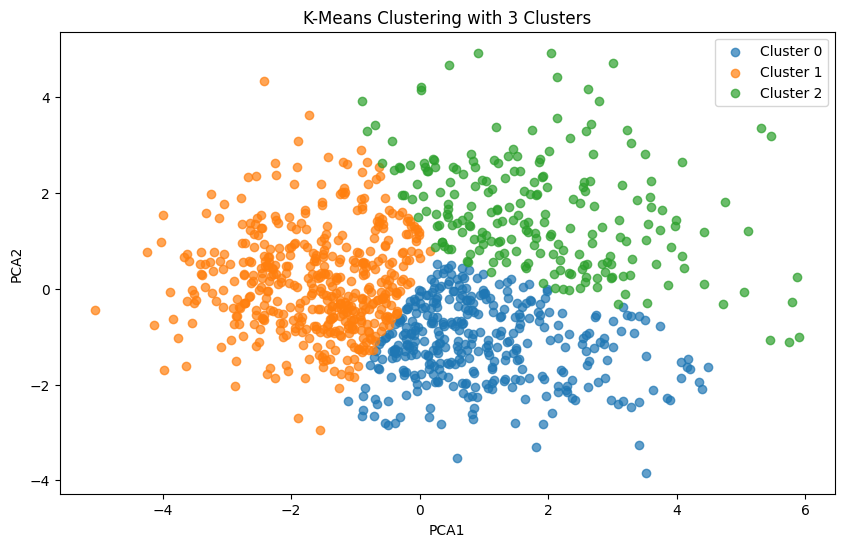

In [135]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Use PCA1 and PCA2 for clustering
pca_data = merged_data[["PCA1", "PCA2"]]

# Determine the optimal number of clusters using the Elbow Method
inertia = []
silhouette_scores = []
k_values = range(2, 10)  # Test cluster counts from 2 to 9

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(pca_data, kmeans.labels_))

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker="o", label="Inertia")
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.legend()
plt.show()

# Print silhouette scores for each k
print("Silhouette Scores:")
for k, score in zip(k_values, silhouette_scores):
    print(f"k={k}: Silhouette Score={score:.3f}")

# Apply K-Means with the chosen number of clusters
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
merged_data["Cluster"] = kmeans.fit_predict(pca_data)

# Visualize Clusters on PCA Plot
plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    cluster_data = merged_data[merged_data["Cluster"] == cluster]
    plt.scatter(cluster_data["PCA1"], cluster_data["PCA2"], label=f"Cluster {cluster}", alpha=0.7)
    
plt.title(f"K-Means Clustering with {optimal_k} Clusters")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.show()

## Clustering Analysis

### Key Insights:
1. **Elbow Method**:
   - The Elbow Method suggests **3 clusters** as the optimal number, balancing simplicity and model fit.

2. **Silhouette Scores**:
   - For `k=3`, the silhouette score is **0.362**, indicating moderate cluster separation.

3. **Cluster Visualization**:
   - **Cluster 0 (Blue)**:
     - Students in the **lower-right region**, characterized by:
       - **Academic challenges** (more failures, lower grades).
       - **Reduced social activity and alcohol consumption** (lower `Walc` and `Dalc`).
   - **Cluster 1 (Orange)**:
     - Students in the **left region**, characterized by:
       - **Better academic performance** (fewer failures, higher grades).
       - **Diverse social behaviors**, with varying levels of drinking and social activity.
   - **Cluster 2 (Green)**:
     - Students in the **upper-right region**, characterized by:
       - **Higher academic challenges** (more failures, lower grades).
       - **Increased social activity and alcohol consumption** (higher `Walc`, `Dalc`, and `goout`).

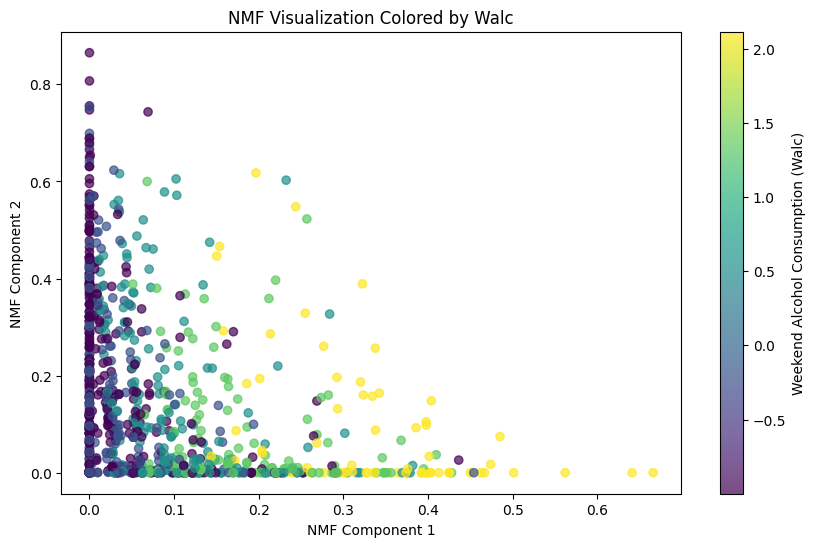

NMF Basis Matrix (Feature Contributions):
                   G1        G2        G3      Dalc      Walc     goout  \
Component 1  0.000000  0.000000  0.000000  5.228192  4.651672  3.314428   
Component 2  3.099429  2.948209  2.703773  0.000000  0.245792  0.587209   

             studytime  failures  absences  
Component 1   0.307508  4.010752  3.365669  
Component 2   1.966510  0.000000  0.234695  


In [136]:
from sklearn.decomposition import NMF

# Select key non-negative features for NMF
nmf_features = ["G1", "G2", "G3", "Dalc", "Walc", "goout", "studytime", "failures", "absences"]
nmf_data = merged_data[nmf_features].clip(lower=0)  # Ensure all values are non-negative

# Apply NMF with 2 components
nmf = NMF(n_components=2, random_state=42, max_iter=500)
W = nmf.fit_transform(nmf_data)  # Student representation in terms of latent components
H = nmf.components_  # Contribution of features to latent components

# Add NMF components to the dataset
merged_data["NMF1"] = W[:, 0]
merged_data["NMF2"] = W[:, 1]

# Plot NMF results
plt.figure(figsize=(10, 6))
plt.scatter(merged_data["NMF1"], merged_data["NMF2"], alpha=0.7, c=merged_data["Walc"], cmap="viridis")
plt.colorbar(label="Weekend Alcohol Consumption (Walc)")
plt.title("NMF Visualization Colored by Walc")
plt.xlabel("NMF Component 1")
plt.ylabel("NMF Component 2")
plt.show()

# Print the basis matrix
nmf_basis = pd.DataFrame(H, columns=nmf_features, index=["Component 1", "Component 2"])
print("NMF Basis Matrix (Feature Contributions):")
print(nmf_basis)

## Non-Negative Matrix Factorization (NMF) Analysis

### Key Insights:
1. **Latent Components**:
   - **NMF Component 1 (Social Activity and Challenges)**:
     - Influenced by workday alcohol consumption (`Dalc`), weekend alcohol consumption (`Walc`), `failures`, and socializing (`goout`).
     - Higher values indicate greater alcohol use, more social activity, and academic struggles.
   - **NMF Component 2 (Academic Success and Focus)**:
     - Dominated by grades (`G1`, `G2`, `G3`) and `studytime`.
     - Higher values represent better academic performance and study habits.

2. **Visualization**:
   - The scatterplot shows:
     - Higher `Walc` values align with greater **NMF1**.
     - Better grades align with higher **NMF2**.

3. **Basis Matrix**:
   - `Dalc` and `Walc` strongly influence Component 1.
   - Grades and `studytime` dominate Component 2.

## Conclusion
This project utilized PCA, K-Means Clustering, and NMF to analyze student behaviors, uncovering patterns in academic performance and social activity. Each model contributed insights, complementing one another to form a comprehensive understanding.

### Key Takeaways:
1. **Behavioral Dimensions**:
   - The analyses consistently highlighted two dominant dimensions:
     - **Academic performance vs. challenges**, characterized by grades, studytime, and failures.
     - **Social activity and alcohol consumption**, driven by `goout`, `Walc`, and `Dalc`.
   
2. **Student Groups**:
   - K-Means clustering identified three distinct student groups:
     - Academically focused students with minimal distractions.
     - Socially active students facing academic struggles.
     - Students balancing academics and social life.

3. **Model Utility**:
   - **PCA** effectively reduced dimensionality, revealing independent components linked to academic and social behaviors.
   - **K-Means** provided actionable clustering, aligning well with real-world student scenarios.
   - **NMF** uncovered latent features that emphasized social and academic dimensions, offering a complementary perspective to PCA.

### Comparison of Models
- **PCA** revealed independent dimensions of behavior (academic vs. social activity).
- **K-Means** grouped students into actionable categories, aligning academic performance and social behaviors.
- **NMF** provided a detailed breakdown of latent behaviors, confirming insights from PCA and clustering.

### Future Improvements:
1. Incorporating supervised learning techniques for validation.
2. Exploring alternative clustering methods (DBSCAN) for improved separation.
3. Refining dimensionality reduction techniques to uncover additional latent features.